In [176]:
import matplotlib.pyplot as plt
import numpy as np
from random import randrange

### Задача 1

In [177]:
A = np.random.randint(low=0, high=6, size=(2, 2))
display(A)
display(np.linalg.eigvals(A))

array([[2, 2],
       [4, 3]])

array([-0.37228132,  5.37228132])

In [178]:
def stepnoy(A, iters=10):
    r0 = np.array([[1.0], [1.0]])
    r = r0
    vals = []
    mu = []
    for i in range(iters):
        r = A@r
        r /= np.linalg.norm(r, ord=2)
        vals.append((r.T@A@r) / (r.T@r))
    B = A - vals[-1]*np.eye(A.shape[0])
    
    r = r0
    for i in range(iters):
        r = B@r
        r /= np.linalg.norm(r, ord=2)
        mu.append((r.T@B@r) / (r.T@r))
    mu = np.array(mu)
    mu += vals[-1]
    
    
    return mu[-1][0][0], vals[-1][0][0]

In [183]:
a, b = stepnoy(A)
display(a, b)

q = abs(a/b)
q**1

-0.3722813232690143

5.372281323270213

0.0692966918274487

Степенной метод сходится как $\left|\frac{\lambda_{min}}{\lambda_{max}}\right|^k$, т.е. как модуль отношения двух найденных собственных значений

### Задача 2

Сложность QR-алгоритма определяется сложностью вычисления QR-разложения $O(n^3)$ и количеством итераций k. Итоговая сложность равна $O(n^3k)$

In [111]:
def QR(A, iters=10000):
    A0 = None
    Ak = A
    err = np.inf
    Q = np.eye(A.shape[0])
    
    for _ in range(iters):
        Qk, Rk = np.linalg.qr(Ak, mode="complete")
        A0, Ak = Ak, Rk@Qk
#         err = np.linalg.norm(Ak - A0)
        Q = Q@Qk
    
    vals = np.sort(np.diag(Ak))
    vects = Q
    
    
    return vals, vects

In [115]:
n = 10
A = np.random.normal(loc = 0.0, scale=1.0, size=(n, n))

# np.allclose(np.sort(QR_algorithm(A, 1000)), np.sort(np.linalg.eigvals(A)))
display(np.sort(np.linalg.eigvals(A)))
display(np.sort(QR(A)[0]))

array([-3.86254016+0.j        , -1.87916045-0.35211175j,
       -1.87916045+0.35211175j, -0.49183585-1.86350108j,
       -0.49183585+1.86350108j,  0.61362906+0.j        ,
        1.55735714-1.76491425j,  1.55735714+1.76491425j,
        3.01619152-0.73237991j,  3.01619152+0.73237991j])

array([-3.86254016, -1.88446065, -1.87386025, -0.53858456, -0.44508714,
        0.61362906,  0.86980278,  2.219512  ,  2.24491149,  3.81287104])

/Users/goloshch/.conda/envs/NPM/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


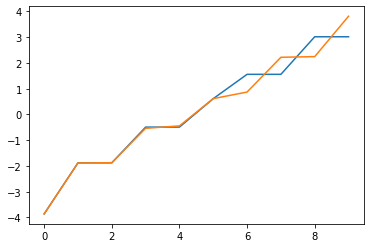

In [116]:
plt.plot(np.sort(np.linalg.eigvals(A)))
plt.plot(np.sort(QR(A)[0]))

In [165]:
N = np.arange(10, 1010, 50)
time = []
err = []
A = np.random.normal(loc = 0.0, scale=1.0, size=(100, 100))
for k in N:
   
    t = %timeit -o -q -n 1 -r 1 QR(A, iters=k)

    time.append(t.average)
#     err.append(err.stdev)

In [166]:
time

[0.04835676902439445,
 0.04516761808190495,
 0.08146314497571439,
 0.11081624904181808,
 0.18690113292541355,
 0.23369984200689942,
 0.2762152790091932,
 0.34676913206931204,
 0.42071806092280895,
 0.47596456902101636,
 0.5097805770346895,
 0.5693851909600198,
 0.6232830509543419,
 0.6873031599679962,
 0.7517120379488915,
 0.8325609429739416,
 0.9078345149755478,
 0.9842835139716044,
 1.0594398669200018,
 1.1500954640796408]

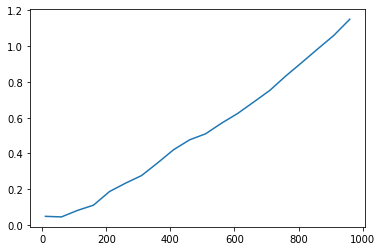

In [167]:
plt.plot(N, time)